In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im = cv2.imread('dog.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)

# Image dimensions
im_h = im.shape[0]
im_w = im.shape[1]
im_c = im.shape[2]


NameError: name 'cv2' is not defined

[[ 208.  208.  208. ...,  204.  204.  204.]
 [ 208.  208.  208. ...,  204.  204.  204.]
 [ 208.  208.  208. ...,  204.  204.  204.]
 ..., 
 [ 206.  206.  205. ...,  211.  212.  212.]
 [ 206.  206.  206. ...,  211.  212.  212.]
 [ 207.  207.  207. ...,  211.  212.  212.]]
(600, 600)


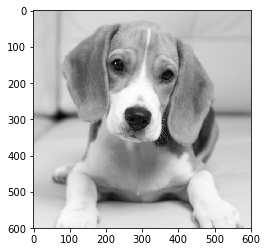

In [3]:
# Reshape so it can be used in tensorflow
# input tensor of shape [batch, in_height, in_width, in_channels]
# kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
im_g = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
im_tensor = im_g.reshape(-1,im_h,im_w,1)

#kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
#kernel = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
#kernel = np.array([[-1,0,1],[0,1,0],[1,0,-1]])
kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
k_tensor = kernel.reshape(3,3,1,1)


# Tensorflow graph
graph = tf.Graph()
with graph.as_default():
    tf_input_image = tf.Variable(np.array(im_tensor, dtype=np.float32))
    tf_blur_kernel = tf.Variable(np.array(k_tensor, dtype=np.float32))    
    tf_convolution_output = tf.nn.conv2d(tf_input_image, tf_blur_kernel, strides = [1, 1, 1, 1], padding = 'SAME')
    
with tf.Session(graph = graph) as sess:
    tf.global_variables_initializer().run()
    transformed_image = tf_convolution_output.eval()
    transformed_image = transformed_image[0, :, :, 0]

transformed_image[transformed_image<0] = 0
print(transformed_image[0:100,0:100])
plt.imshow(transformed_image,cmap='gray')

print(transformed_image.shape)

(300, 300)


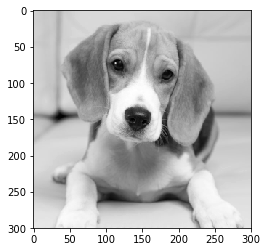

In [4]:
# Tensorflow graph with max_pool
graph = tf.Graph()
with graph.as_default():
    tf_input_image = tf.Variable(np.array(im_tensor, dtype=np.float32))
    tf_blur_kernel = tf.Variable(np.array(k_tensor, dtype=np.float32))    
    tf_convolution_output = tf.nn.conv2d(tf_input_image, tf_blur_kernel, strides = [1, 1, 1, 1], padding = 'SAME')
    tf_relu_output = tf.nn.relu(tf_convolution_output)
    pool = tf.nn.max_pool(value=tf_relu_output,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    
with tf.Session(graph = graph) as sess:
    tf.global_variables_initializer().run()
    transformed_image = pool.eval()
    transformed_image = transformed_image[0, :, :, 0]

transformed_image[transformed_image<0] = 0
plt.imshow(transformed_image,cmap='gray')

print(transformed_image.shape)

(600, 600)


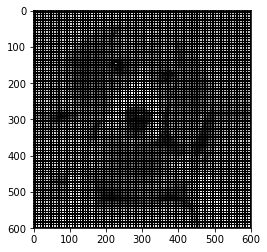

In [6]:
# Tensorflow graph
graph = tf.Graph()
with graph.as_default():
    tf_input_image = tf.Variable(np.array(im_tensor, dtype=np.float32))
    tf_blur_kernel = tf.Variable(np.array(k_tensor, dtype=np.float32))
    tf_convolution_output = tf.nn.conv2d(tf_input_image, tf_blur_kernel, strides = [1, 1, 1, 1], padding = 'SAME')
    tf_relu_output = tf.nn.relu(tf_convolution_output)
    pool = tf.nn.max_pool(value=tf_relu_output,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    deconv = tf.nn.conv2d_transpose(pool, tf_blur_kernel,output_shape=[1,im_h,im_w,1] ,strides=[1,2,2,1], padding='SAME')
    deconv2 = tf.nn.conv2d(pool, tf_blur_kernel, strides=[1,1,1,1], padding='SAME')
    
with tf.Session(graph = graph) as sess:
    tf.global_variables_initializer().run()
    transformed_image = deconv.eval()
    transformed_image = transformed_image[0, :, :, 0]

transformed_image[transformed_image<0] = 0
plt.imshow(transformed_image,cmap='gray')

print(transformed_image.shape)

In [5]:
# Read image
im = cv2.imread('dog.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

# Image dimensions
im_h = im.shape[0]
im_w = im.shape[1]
im_c = im.shape[2]

# Reshape so it can be used in tensorflow
# input tensor of shape [batch, in_height, in_width, in_channels]
# kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
im_g = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
im_tensor = im_g.reshape(-1,im_h,im_w,1)

kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
k_tensor = kernel.reshape(3,3,1,1)

# Tensorflow graph 
graph = tf.Graph()
with graph.as_default():
    tf_input_image = tf.Variable(np.array(im_tensor, dtype=np.float32))
    tf_blur_kernel = tf.Variable(np.array(k_tensor, dtype=np.float32))
    tf_convolution_output = tf.nn.conv2d(tf_input_image, tf_blur_kernel, strides = [1, 1, 1, 1], padding = 'SAME')
    tf_relu_output = tf.nn.relu(tf_convolution_output)
    pool = tf.nn.max_pool(value=tf_relu_output,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    deconv = tf.nn.conv2d_transpose(pool, tf_blur_kernel,output_shape=[1,im_h,im_w,1] ,strides=[1,2,2,1], padding='SAME')
    deconv2 = tf.nn.conv2d(pool, tf_blur_kernel, strides=[1,1,1,1], padding='SAME')
    
with tf.Session(graph = graph) as sess:
    tf.global_variables_initializer().run()
    transformed_image = deconv.eval()
    transformed_image = transformed_image[0, :, :, 0]